In [1]:
from __future__ import print_function, division
import time, os
import numpy as np
import matplotlib.pyplot as plt
import sys
#import networkx as nx
import pandas
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# load data
ata6_given_cost = pandas.read_csv('prob_ata6_given_cost.csv')
cost_given_ata6 = pandas.read_csv('prob_cost_given_ata6.csv')

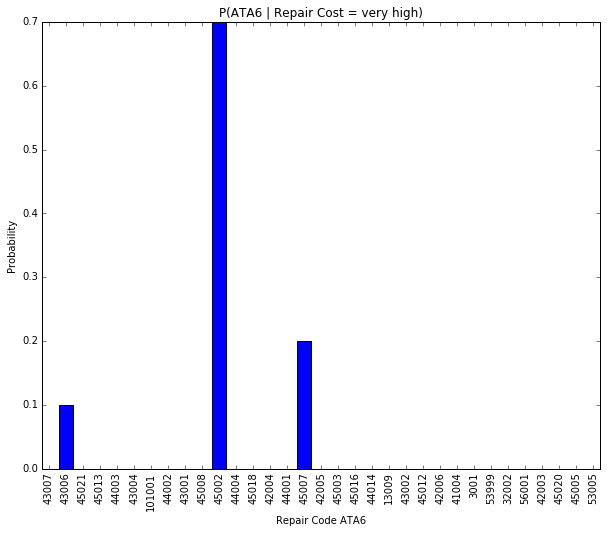

In [3]:
c = 'very high'
bars = []
heights = []
data = ata6_given_cost[(ata6_given_cost['cost'] == c) & (ata6_given_cost['ATA6'] != 'subtotal')]
bars = data['ATA6']
heights = data['prob']
numbars = len(bars)
plt.xticks(range(numbars), bars, rotation='vertical')
plt.bar(range(numbars), heights, align='center')
plt.xlabel('Repair Code ATA6')
plt.ylabel('Probability')
plt.title('P(ATA6 | Repair Cost = ' + c + ')')
filename = 'prob_ATA6_given_Cost_'+c+'.png'
plt.show()

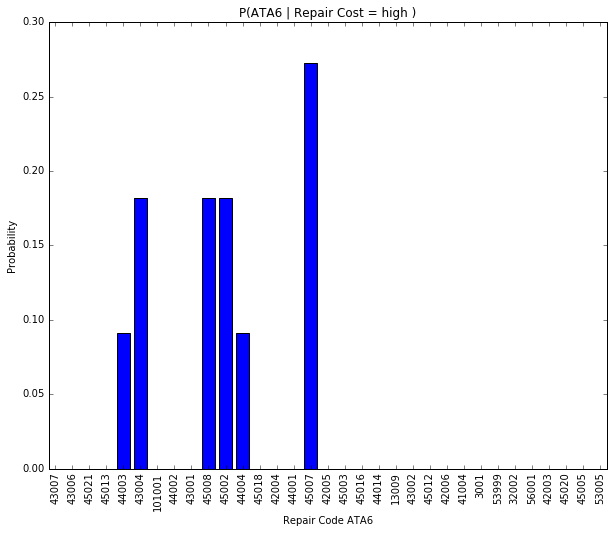

In [4]:
c = 'high '
bars = []
heights = []
data = ata6_given_cost[(ata6_given_cost['cost'] == c) & (ata6_given_cost['ATA6'] != 'subtotal')]
bars = data['ATA6']
heights = data['prob']
numbars = len(bars)
plt.xticks(range(numbars), bars, rotation='vertical')
plt.bar(range(numbars), heights, align='center')
plt.xlabel('Repair Code ATA6')
plt.ylabel('Probability')
plt.title('P(ATA6 | Repair Cost = ' + c + ')')
filename = 'prob_ATA6_given_Cost_'+c+'.png'
plt.show()

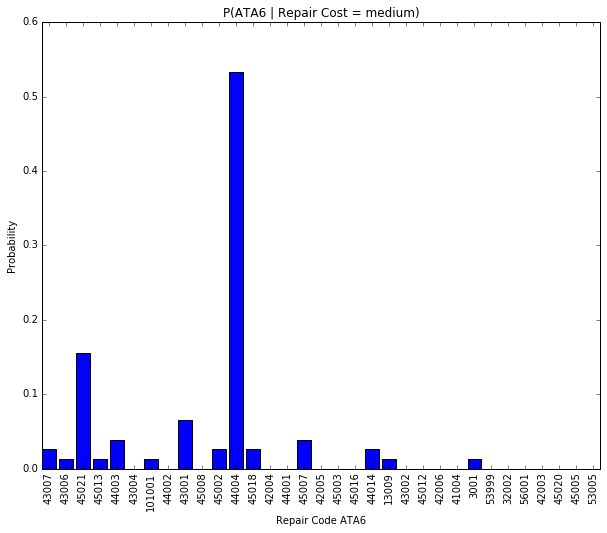

In [5]:
c = 'medium'
bars = []
heights = []
data = ata6_given_cost[(ata6_given_cost['cost'] == c) & (ata6_given_cost['ATA6'] != 'subtotal')]
bars = data['ATA6']
heights = data['prob']
numbars = len(bars)
plt.xticks(range(numbars), bars, rotation='vertical')
plt.bar(range(numbars), heights, align='center')
plt.xlabel('Repair Code ATA6')
plt.ylabel('Probability')
plt.title('P(ATA6 | Repair Cost = ' + c + ')')
filename = 'prob_ATA6_given_Cost_'+c+'.png'
plt.show()

In [6]:
selected_ata6 = []
threshold = 0.1
for c in ['medium', 'high ', 'very high']:
    data = ata6_given_cost[(ata6_given_cost['cost'] == c)]
    data = data[(data['ATA6'] != 'subtotal') & (data['prob'] > threshold)]
    if len(selected_ata6) == 0:
        selected_ata6 = data[['ATA6','cost','count','prob']]
    else:
        selected_ata6 = selected_ata6.append(data[['ATA6','cost','count','prob']])

print('Selected ATA6 with P(ATA6 | cost) > 0.1:')
print(selected_ata6['ATA6'].unique() )
selected_ata6

Selected ATA6 with P(ATA6 | cost) > 0.1:
['45021' '44004' '43004' '45008' '45002' '45007']


,ATA6,cost,count,prob
70,45021,medium,12,0.155844
79,44004,medium,41,0.532468
107,43004,high,2,0.181818
111,45008,high,2,0.181818
112,45002,high,2,0.181818
117,45007,high,3,0.272727
146,45002,very high,7,0.700000
151,45007,very high,2,0.200000


In [10]:
for ata6 in selected_ata6['ATA6'].unique():
    data = cost_given_ata6[cost_given_ata6['ATA6'] == ata6]
    print(data)
    print('\n')

C:\Users\z\Anaconda3\lib\site-packages\pandas\core\ops.py:716: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [9]:
cost_given_ata6

,Unnamed: 0,ATA6,cost,count,prob
0,0,43007,very low,34,0.708333
1,1,43007,low,12,0.250000
2,2,43007,medium,2,0.041667
3,3,43007,high,0,0.000000
4,4,43007,very high,0,0.000000
5,5,43007,subtotal,48,1.000000
6,6,43006,very low,110,0.932203
7,7,43006,low,6,0.050847
8,8,43006,medium,1,0.008475
9,9,43006,high,0,0.000000
